# Data analysis of Ames, IA Housing dataset- Part III:

# This notebook will implement some regression models to more fully answer the main research question regarding which factors most signficantly impact home prices.  

# More specifically, the 1st OLS model's specification will be quite simple, with just 2 covariates. Each subsequent model will add in 2-3 variables or sets of indicator variables.

# Sensitivity analysis will therefore be implemented wfor the other several OLS model specifications: i.e., each model will gradually add 2-3 additional covariates, and keep the covariates from the simpler models. This way, we can look at metrics such as the Adjusted-R-squared coefficient to examine whether including specific varables seems to improve goodness of fit with respect to the home sale price.

# Data analysis and visualization imports

In [1]:
#For data analysis modules
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

#import vsualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import the dataset. 

### Import the dataset using a range of the 2nd through 118th columns.

In [190]:
# since the first column is unnamed and does not actually contain data, specify a range to avoid importing this column
range_1 = [i for i in range(1,118)]

#input the specified range as the argument for the pd.read_csv's usecols parameter
usecols = range_1

df_housing = pd.read_csv('Amex_IA_dataset_cleaned.csv', usecols=usecols)
df_housing.head(10)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,1,0,0,0,0,0,0,0,0,0
5,6,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,0,0,0,0
6,7,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,0,1,0,0,0
7,8,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0
8,9,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,1,0,0,0,0,0,0,0
9,10,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,0,0,0,0,0


In [188]:
#show the total number of columns for each dtypes 
df_housing.dtypes.value_counts()

int64      77
object     38
float64     2
dtype: int64

## Notice the dataframe includes quite a few object variables. Given that the major categorical data/variables have been converted to binary/int64 variables, these remaining object variables will need to be deleted from the dataframe.

# Implement Regression models with different specifications to help answer the following: 

## 1.) Which factors are most important in affecting home prices? Is the famous saying "location, location, location" true even for homes sold within a given city (i.e., comparing housing sale prices by individual neighborhoods)?

## 2.)a.)  How well can housing prices for Ames, IA be predicted from the dataset using statsmodels to implement OLS?

## 2.) b.)What specifications of the OLS models provide the best accuracy and goodness of fit? 
## 2c.) Similarly, what is the overall unexplained variance in the model with the best fit: i.e., measure the root mean squared error (RMSE)?

## 2d.) Is accuracy improved if using scikitlearn to implement an OLS via machine-learning methods (i.e., bifurcating the dataset into training and test datasets)?

## 2e.) Do other machine learning algorithms have higher predictive accuracy: e.g., Gradient Boosting regressors?

# Part III: OLS regression analysis:

# Data cleaning and prep:

# First, prepare the data for regression analysis: check the number of columns that contain only numeric or boolean data

In [192]:
# for purposes of preparing the data for the Gradient Boosting model, create a list of only the numeric and boolean variables
numeric = df_housing.select_dtypes(include=['int64','float64',]).columns

#convert to list
numeric  = list(numeric_bool)

#show number of elements in this list of column names
len(numeric)

77

# Notice there are 77 columns that can be potentially inputted into thevarious regression models. 

# Let's create a new Dataframe with only these 77 columns:

# To implement this, delete ALL object variables from the Dataframe using the select_dtypes() method.

In [164]:
#delete all object variables/columns from the original dataframe and assign this to a new dataframe
df_housing.drop(df_housing.select_dtypes(['object']), inplace=True, axis=1)

## Sanity check: check the dtypes of each column of the dataframe, and count the number of these columns

In [165]:
df_housing.dtypes.value_counts()

int64      77
float64     2
dtype: int64

## Notice the select_dtypes() method worked correctly: there are 79 columns left over after deleting the object columns. This is higher than the numeric_bool list only because the dataframe also includes ID and SalePrice (i.e., the outcome/dependent variable).

# OLS Model 1: Lotarea (i.e., total size of home lot) and Total # of rooms above ground

In [15]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y1 = df_housing['SalePrice']

#specify/define the covariates for the 1st specification
X1 = df_housing[['LotArea', 'TotRmsAbvGrd']]

#add constant/intercept
X1 = sm.add_constant(X1)

#apply OLS estimation to the specification
OLS1 = sm.OLS(Y1,X1)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res1 = OLS1.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.311
Method:                 Least Squares   F-statistic:                     127.3
Date:                Tue, 26 Feb 2019   Prob (F-statistic):           1.14e-51
Time:                        11:38:22   Log-Likelihood:                -18271.
No. Observations:                1460   AIC:                         3.655e+04
Df Residuals:                    1457   BIC:                         3.656e+04
Df Model:                           2                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6991.4753      1e+04      0.697   

# OLS Model 2: add Yearbuilt as a covariate

In [16]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y2 = df_housing['SalePrice']

#specify/define the covariates for the 2nd specification
#Include all previous covariates, but also: YearBuilt
X2 = df_housing[['LotArea', 'TotRmsAbvGrd', 'YearBuilt']]

#add constant/intercept
X2 = sm.add_constant(X2)

#apply OLS estimation to the specification
OLS2 = sm.OLS(Y2,X2)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res2 = OLS2.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     283.5
Date:                Tue, 26 Feb 2019   Prob (F-statistic):          6.36e-145
Time:                        11:39:17   Log-Likelihood:                -17981.
No. Observations:                1460   AIC:                         3.597e+04
Df Residuals:                    1456   BIC:                         3.599e+04
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -2.451e+06   1.02e+05    -24.049   

## Brief overview of Model 2 results:

## Notice the Adjusted R2 coefficient increased quite substantially: namely, a 26.6% increase in goodness of fit merely by adding YearBuilt, which is also highly statistically significant and has a high magnitude. For example, for every newer year of the home that was built, the home's expected sale price increases by $1254.41. This provides some evidence (by no means conclusive) that YearBuilt plays a prominent role in affecting housing sale prices, on average.

# OLS model 3: add Fireplace, Fullbath, and Garagearea

In [19]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y3 = df_housing['SalePrice']

#specify/define the covariates for the 2nd specification
#Include all previous covariates, but also: Fireplaces, Fullbath, GrLivArea (i.e., total above ground living area/size)
X3 = df_housing[['LotArea', 'TotRmsAbvGrd', 'YearBuilt','Fireplaces', 'FullBath', 'GarageArea']]

#add constant/intercept
X3 = sm.add_constant(X3)

#apply OLS estimation to the specification
OLS3 = sm.OLS(Y3,X3)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res3 = OLS3.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res3.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     187.7
Date:                Tue, 26 Feb 2019   Prob (F-statistic):          4.25e-177
Time:                        11:40:16   Log-Likelihood:                -17785.
No. Observations:                1460   AIC:                         3.558e+04
Df Residuals:                    1453   BIC:                         3.562e+04
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.456e+06   1.09e+05    -13.387   

## Notice the model has a higher condition number, which suggests there is a high degree of multicolliniarity.

# As a result, let's estimate the variance inflation factor (VIF) for the covariates of specification 3 to examine the extent of mutlicollinearity.

# Before moving on, why is multicollinerity a problem? 

## It can cause 2 problems, although these issues do not affect the overall goodness-of-fit or overall predictive ability for a regression model as a whole: a.) it can reduce the accuracy of standard errors for one or more covariates (i.e., statistical signfiacnce test results are suspect), and/or b.) reduce the precision of the covariate's coefficients.

# Estimate VIF for covariates of Specification 3:

In [21]:
#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X3: i.e., the covariates from the 3rd specification:
pd.Series([variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])],
          index=X3.columns)

const           6750.473572
LotArea            1.110331
TotRmsAbvGrd       1.705723
YearBuilt          1.627378
Fireplaces         1.212919
FullBath           1.936296
GarageArea         1.513282
dtype: float64

## The VIF estimates are rather unexpected: none of the variables individually has a particularly high VIF, but the condition number is extremely high. 

## Generally, a VIF of 2.5 to 5 is considered moderately high. (Note that a high constant term for the VIF is not at all a cause for concern, and in fact a high VIF constant is more or less expected, especially as additional covariates are added to the model). If this were the case, it might give some cause for concern, but should not be perceived as a major threat to the statistical signficance or  precision of the covariate's coefficients. 

## A VIF of 5 or greater, however, is considered very high: for reference, a VIF of 2.5 is synonymous with an R-squared value of 0.6 between the given variables. 

## Since none of the covariates have a particularly high level of multicollinearity, it does not make much sense to omit any from the OLS models. This is especially true for 2 reasons: a.) each of these factors have a basis in economic theory for affecting home sale prices; and b.) each of the covariates also has a high degree of simple linear correlation with SalePrice, as shown by the barplot from Part II of this housing data analysis project. 

## For reference, see this article regarding measuring and dealing with mutlicollinearity: <http://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/>. 

## Regarding the Model 3 estimates, notice the Adjusted R2 increased by ~10%, which suggests that Fireplace, Fullbath, and/or GarageArea explain a fairly high degree of the variance in housing sale prices.

# OLS Model 4: adds Total basement sq feet; Garagearea; and various SaleType Indicator variables: the reference group being a "normal" sale

In [26]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y4 = df_housing['SalePrice']

#specify/define the covariates for the 2nd specification
#Include all previous covariates, but also: TotalBsmtSF, SaleType, and GarageArea
X4 = df_housing[['LotArea', 'TotRmsAbvGrd', 'YearBuilt','Fireplaces','TotalBsmtSF', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial', 'GarageArea']]

#add constant/intercept
X4 = sm.add_constant(X4)

#apply OLS estimation to the specification
OLS4 = sm.OLS(Y4,X4)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res4 = OLS4.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res4.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     176.5
Date:                Tue, 26 Feb 2019   Prob (F-statistic):          3.98e-258
Time:                        12:12:57   Log-Likelihood:                -17689.
No. Observations:                1460   AIC:                         3.540e+04
Df Residuals:                    1448   BIC:                         3.546e+04
Df Model:                          11                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.268e+06   1.25e+05    -10.153   

## As the OLS output suggested, the overall degree of multicolliniearity is now exceptionally high. Once again, however, none of the variables has a particularly high VIF. It could be partly from including a set of indicator variables. In addition, the VIF is not actually much higher than it was for the original Model 3 specification.

# Run OLS Model 5: add OverallQual (i.e., a measure of the overall build quality, aminities/features, and condition of the home) and YearRemodAdd (i.e., the year a home was remodelled)

In [40]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y5 = df_housing['SalePrice']

#specify/define the covariates for the 2nd specification
#Include all previous covariates, but also: TotalBsmtSF, SaleType, and GarageArea
X5 = df_housing[['LotArea', 'TotRmsAbvGrd', 'YearBuilt','Fireplaces','TotalBsmtSF', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial', 'GarageArea', 'OverallQual', 'YearRemodAdd']]

#add constant/intercept
X5 = sm.add_constant(X5)

#apply OLS estimation to the specification
OLS5 = sm.OLS(Y5,X5)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res5 = OLS5.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res5.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     213.7
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:34:36   Log-Likelihood:                -17479.
No. Observations:                1460   AIC:                         3.499e+04
Df Residuals:                    1446   BIC:                         3.506e+04
Df Model:                          13                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -1.076e+06   1.11e+05     -9.684   

## The condition number is quite a bit larger. So let's examine the VIF of this specification's covariates.

In [41]:
#import the VIF module from the statsmodels library
from statsmodels.stats.outliers_influence import variance_inflation_factor


#calculate the VIF for X4: i.e., the covariates from the 4th specification:
pd.Series([variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])],
          index=X5.columns)

const           15584.076383
LotArea             1.157626
TotRmsAbvGrd        1.387058
YearBuilt           2.030342
Fireplaces          1.348148
TotalBsmtSF         1.648066
Abnorml             1.033909
AdjLand             1.014033
Alloca              1.014404
Family              1.009499
Partial             1.210617
GarageArea          1.731232
OverallQual         2.590346
YearRemodAdd        1.779312
dtype: float64

## Finally, the VIF of 2 covariates exceeds 2:YearBuilt and OverallQual. This is probably because YearRemodAdd (i.e., the year a home was rebuilt) was added to the model, which probably correlates with the YearRemodAdd variable.

## A VIF of 2.59 reflects a moderately high degree of mutlicolliniarity, but it's not so high as to be very problematic (e.g., this VIF is well below 5, which would most likely pose problems in the coefficient estimates).

# Run OLS model 6: add a set of neighborhood indicators: the exclusion group is Meadow Village (MeadowV). 

In [109]:
#import statsmodels for OLS regression
import statsmodels.api as sm

#specify the dependent/outcome variable
Y6 = df_housing[['SalePrice']]

#specify/define the covariates for the 2nd specification
#Include all previous covariates, but also: TotalBsmtSF, SaleType, and GarageArea
X6 = df_housing[['LotArea', 'TotRmsAbvGrd', 'YearBuilt','Fireplaces','TotalBsmtSF', 'Abnorml', 'AdjLand', 'Alloca', 'Family', 'Partial', 'GarageArea', 'OverallQual',
                'Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr',  'CollgCr', 'Crawfor', 'Edwards', 'Gilbert','IDOTRR',
                 'Mitchel', 'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown', 'SWISU', 'Sawyer', 'SawyerW',
                 'Somerst', 'StoneBr', 'Timber', 'Veenker', 'BsmtFinSF1']]

#add constant/intercept
X6 = sm.add_constant(X6)

#apply OLS estimation to the specification
OLS6 = sm.OLS(Y6,X6)

#derive the OLS model's results
#Use heteroksedasticity robust standard errors--'HC3' to correct for any possible heteroskedasticity issues
#this way, the estimated standard errors (SEs) will not be biased by enssuring the variance is constant (i.e., homoskedastic)
res6 = OLS6.fit(cov_type='HC3')

#display the OLS coefficients/output
print(res6.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     126.1
Date:                Tue, 26 Feb 2019   Prob (F-statistic):               0.00
Time:                        16:07:39   Log-Likelihood:                -17314.
No. Observations:                1460   AIC:                         3.470e+04
Df Residuals:                    1422   BIC:                         3.490e+04
Df Model:                          37                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -4.915e+05   1.53e+05     -3.215   

# Analysis of Model 6 OLS results:

## Adding in the neighborhood indicators has improved the overall goodness of fit for the model by a moderate margin: a 4.5% increase. The saying "location, location, location" appears to have some validity from a scientific and statistical standpoint, but the saying clearly does not carry one very far, unless you factor in other characteristics that appear to play a much larger role: the rated quality of a home; the size of the home's lot; the number of rooms in the home; etc.

## Overall, the magnitudes of most variables' coefficients is a bit higher, but the coefficients have not been changed substantially. Similarly, the signs of the coefficients are unchanged.

## Compared with the neighborhood that has the least expensive home sale prices (i..e, Meadow Village), fully half of the 24 other neighborhoods (i.e., 12 of these 24) had housing sale prices that significantly exceeded the mean for Meadow Village.

# Make predictions using the Model 6 OLS results applied to part of the actual SalePrice data from the 

## First, show the parameters that were used for the OLS model 6

In [43]:
#list all parameters from the model 6 specification
res6.params

const          -491471.789898
LotArea              0.583424
TotRmsAbvGrd     10145.959774
YearBuilt          214.845925
Fireplaces        9574.608320
TotalBsmtSF         14.052616
Abnorml          -6406.752374
AdjLand           -374.368854
Alloca           -4331.767143
Family          -19197.587646
Partial          19278.735739
GarageArea          38.191285
OverallQual      19185.721344
Blmngtn          -5442.475430
Blueste          -7792.425836
BrDale          -18141.740782
BrkSide          13903.833888
ClearCr          22223.629909
CollgCr          10670.426505
Crawfor          34661.313495
Edwards          -2509.121818
Gilbert           5951.451235
IDOTRR           -3338.570020
Mitchel          -1248.710467
NAmes             1162.175176
NPkVill         -11262.940741
NWAmes             118.885743
NoRidge          79819.760840
NridgHt          51956.178250
OldTown            758.282910
SWISU             4208.726021
Sawyer            1551.301252
SawyerW           6784.702163
Somerst   

# Make predictions on expected home sale prices using the OLS model 6 coefficient estimates via the predict method

In [59]:
#make predictions of expected home sale prices based on OLS model 6 coefficient estimates
Y_pred = res6.predict(X6)

#print out some of the predictions
print(Y_pred)

0       216406.755374
1       217081.899972
2       205872.333918
3       207958.644576
4       341291.446685
5       133892.533209
6       271033.428963
7       213552.383005
8       187186.331434
9       147202.475912
10      132069.843522
11      384639.307104
12      116054.517109
13      243644.592014
14      157662.499335
15      159160.191851
16      158420.181229
17       96302.519819
18      160678.817492
19      120504.347894
20      322046.685887
21      148583.691995
22      234451.635278
23      154448.857130
24      132892.815151
25      290061.018501
26      118839.252987
27      309206.457029
28      173104.478211
29       73929.706948
            ...      
1430    159058.832637
1431    139127.319034
1432     74536.085933
1433    186392.155903
1434    150641.815856
1435    161602.526601
1436    109974.840023
1437    334803.088125
1438    169604.879682
1439    179946.149406
1440    233069.910245
1441    148759.783390
1442    326995.325511
1443    125226.063473
1444    20

# Calculate the Root Mean Squared Error (RMSE): i.e., a metric of how far the predicted regression estimates of the outcome variable are from the actual outcome variable data. 

## More specifically, RMSE is the standard deviation of the variance that's unexplained by a given regression model. 

# Define a function for calculating the RMSE:

In [64]:
#imports
import numpy as np
from math import sqrt

#define a function to calculate RMSE:
def rmse(Y6, Y_pred):
    #input the actual values of the outcome variable--i.e. Y6--into an array
    Y_data = np.array(Y6)
    #input the predicted values of the outcome variable--i.e., based on the coefficient estimates of OLS model 6 into an array
    Y_predict = np.array(Y_pred)
    #calculate the squared difference between the actual values of Y and the predicted values
    error = (Y_data - Y_predict)**2
    #take the average of these squared differences
    error_avg = round(np.mean(error))
    #take the square root of the mean/average of squared differences to perform the final calculation of RMSE
    error_sq = sqrt(error_avg)
    #return the final calculate values
    return error_sq



# Calculate the RMSE for estimates of OLS model 6:

## Apply the rmse function to the model 6 estimates:

In [65]:
#apply the rmse function to the data
rmse(Y6, Y_pred)

34196.31155548797

# Analysis of RMSE for OLS model 6:

## The RMSE shows that the overall unexplained variance of the housing model is $34,196.31. While this may seem high (and certainly isn't particularly low), this is not exceptionally high given the actual sample housing values. 

## Let's look back on the summary statistics for SalePrice, and keep this in mind when analyzing the RMSE:

In [67]:
df_housing['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

## Comparison and analysis:

## Notice the sample average is $180,921,20. The RMSE is fairly sizable, but is less than 20% of the sample average: more preciesly, the RMSE is 18.9% of the sample average.  This comparison implies that the OLS model 6 estimates have a roughly 81.1% accuracy in terms of predicting average housing sale prices. 

## Keep in mind that this level of accuracy was achieved without yet resorting to any additional machine learning algorithms, such as ridge regression, lasso, or Gradient Boosted Resgressors.

## Of course, the level of the model's accuracy can also be visualized with a plot. The following plot will compare the actual vs predicted (again, using the OLS model 6 estimates) values of home sale prices.

# Display plot showing visualization comparing predicted vs actual home sale prices (using OLS model 6 estimates)

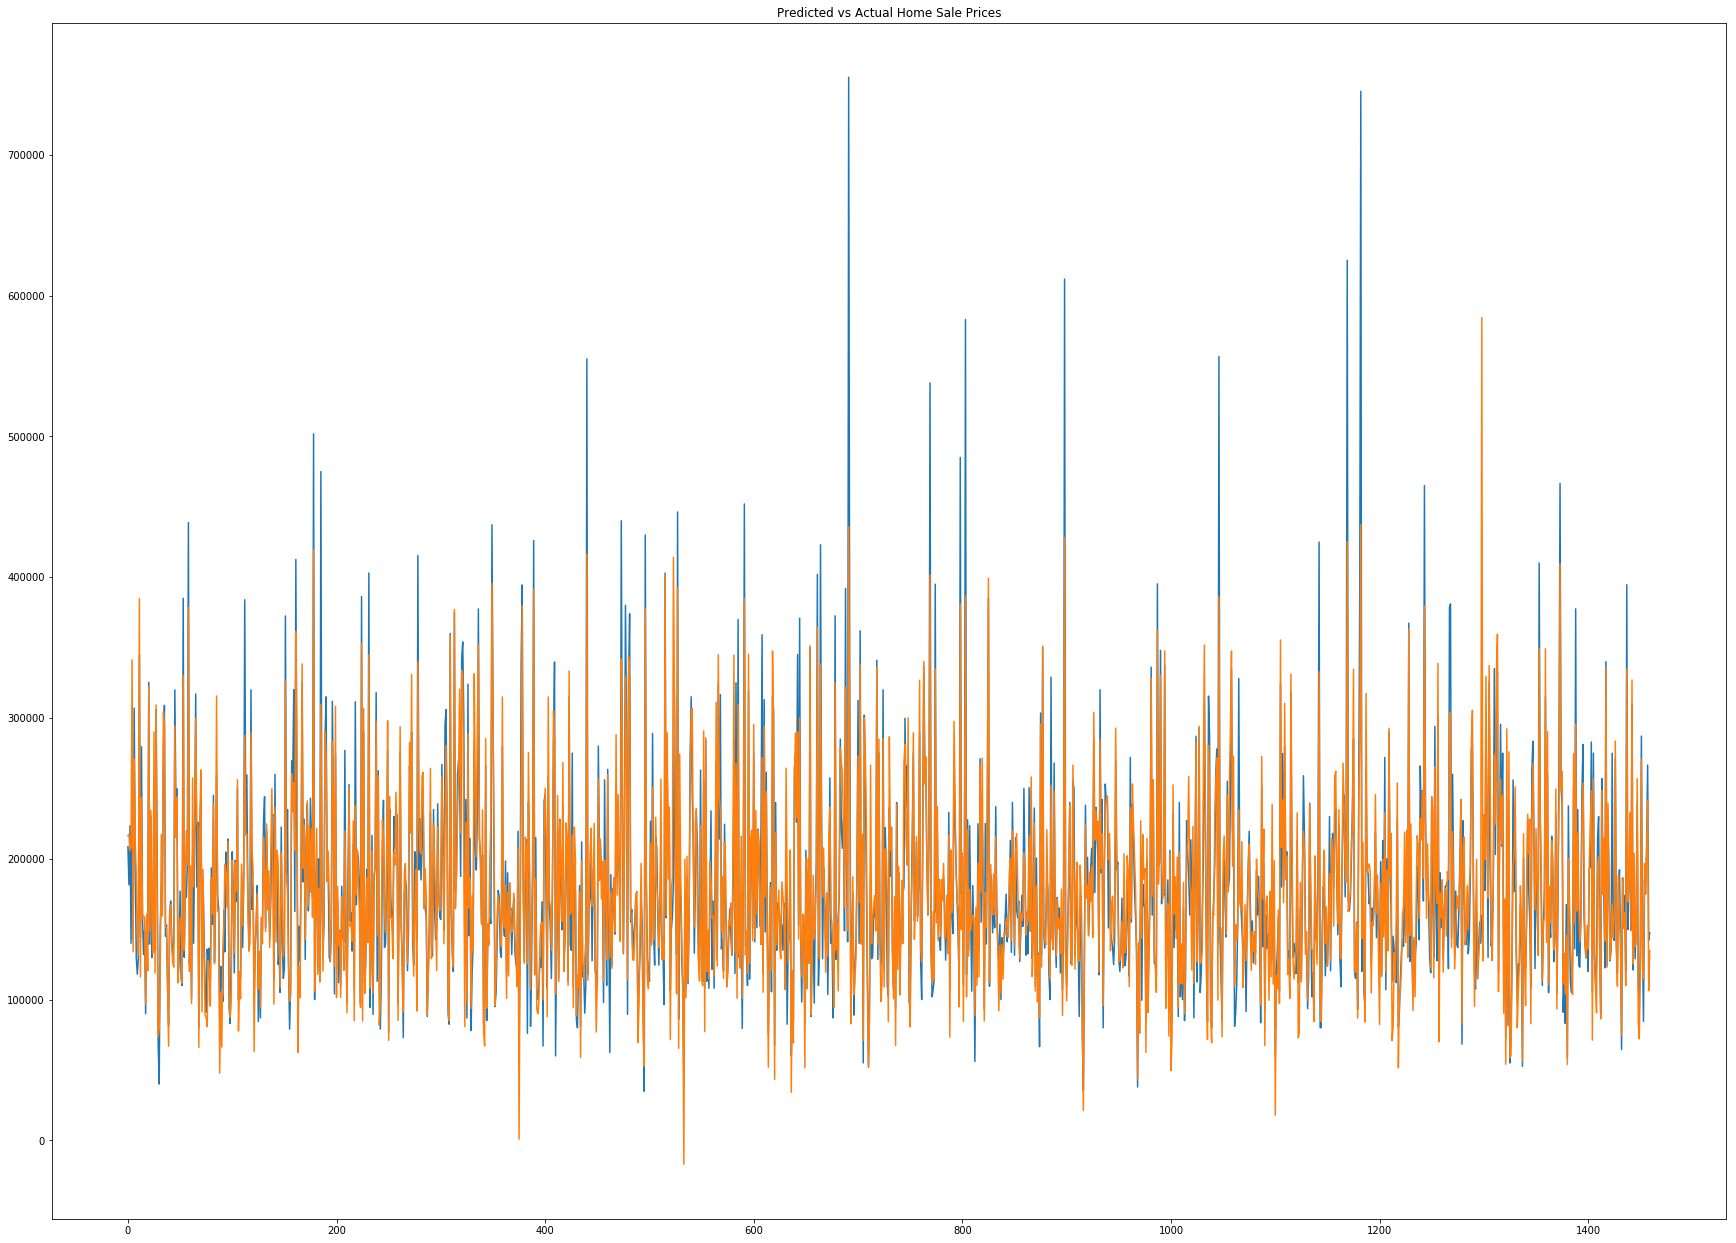

In [81]:
import matplotlib.pyplot as plt

#specify figure size
f, ax2 = plt.subplots(figsize=(30,22))

#add title to plot
plt.title('Predicted vs Actual Home Sale Prices')

ax2.plot(Y6, label = "Actual")

ax2.plot(y_pred, label='predicted')

# Analysis of plot:

## Again, overall the model predicted fairly well for most homes.

## However, the plot gives a richer sense of detail, however: we can see that the model's predictions differ by a moderate to large margin only for a relatively few number of homes (given the dataset includes 1,460 homes). Roughly speaking, only about a dozen homes in the dataset have actual prices that were off by a fairly large margin (20-40% or higher). Therefore, it could just be these relatively few outliers that are actually making the predictions unusually more difficult.

# Visualize the results of OLS model 6 as partial regression plots: i.e., how well do the OLS results predict housing prices comparing the predicted and actual home sale prices for a given covariate?

# Partial regression plot 1: comparing predicted and actual home sale prices for homes with a given Overall quality (OverQual):

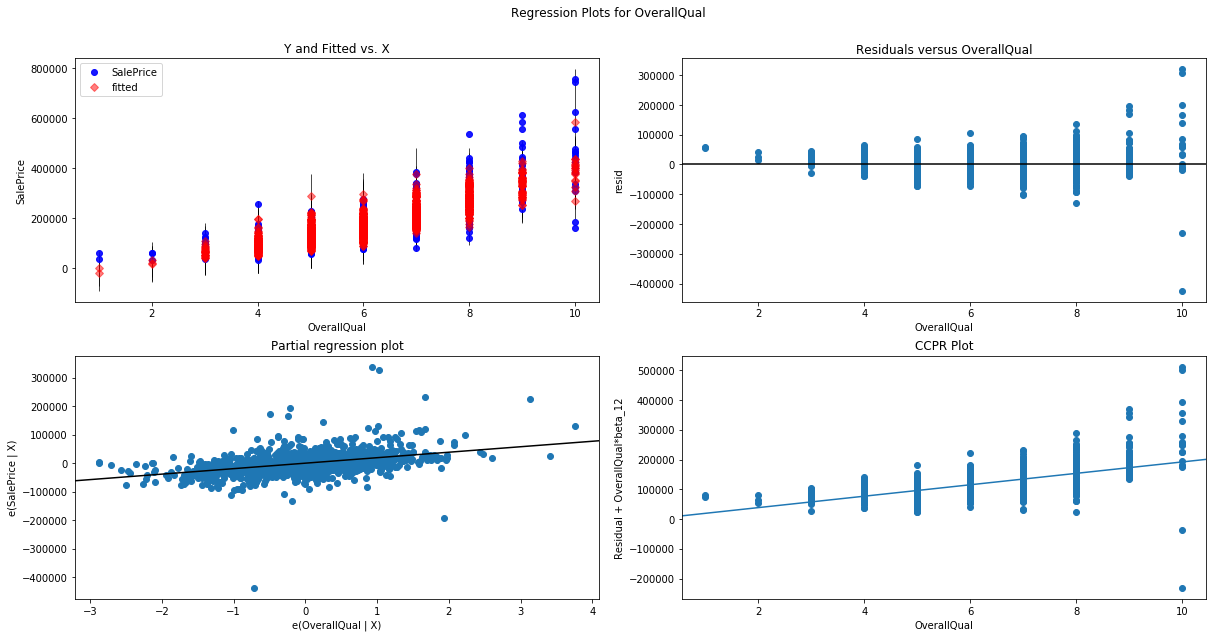

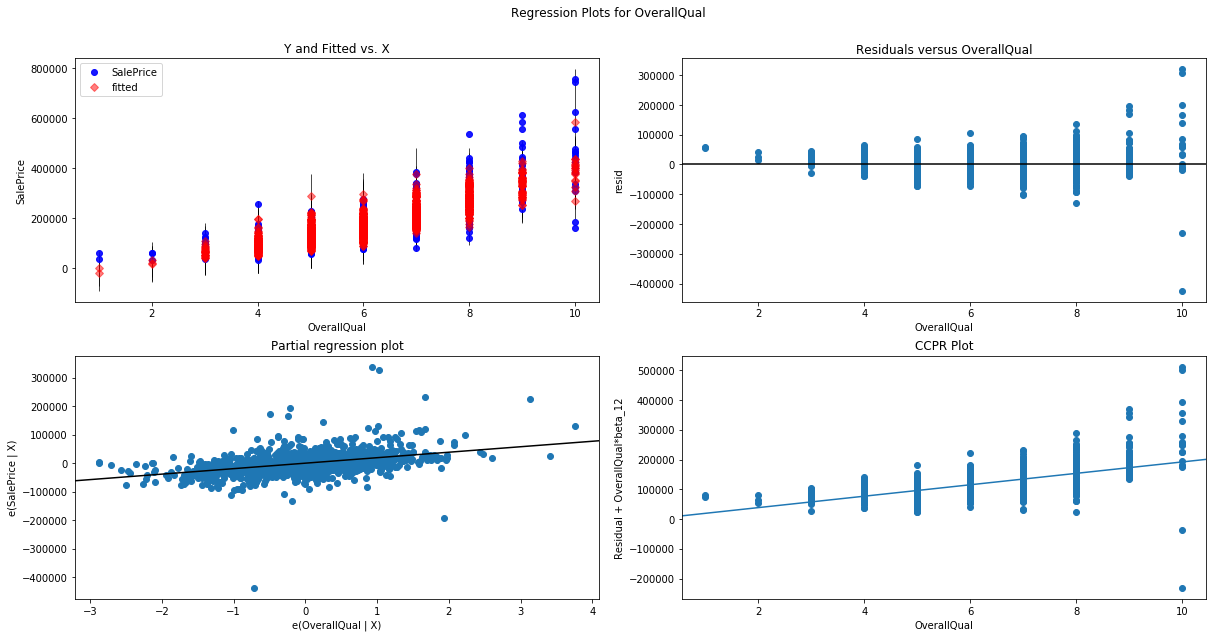

In [45]:
#specify the size of the figure
fig = plt.figure(figsize=(17,9))

#input the covariate for the partial regression plot
fig = sm.graphics.plot_regress_exog(res6, 'OverallQual', fig=fig)

#display plot
fig

# Analysis of plot 1:

## The predicted home sale prices actually matches up fairly well with the actual home sale prices, with the only somewhat notable exceptions being homes with an OverallQual of a 1 or 9, and, to a lesser extent, an 8 or 2. Homes with an OveralQual of 4-7 actually have good, if not very good, housing price predictions.

## Reassuringly, the residuals are not correlated with the OveralQual variable, which is one of the assumptions/important aspects of the OLS model.

# Partial regression plot 2: comparing predicted and actual home sale prices for homes based on the year it was built (YearBuilt):

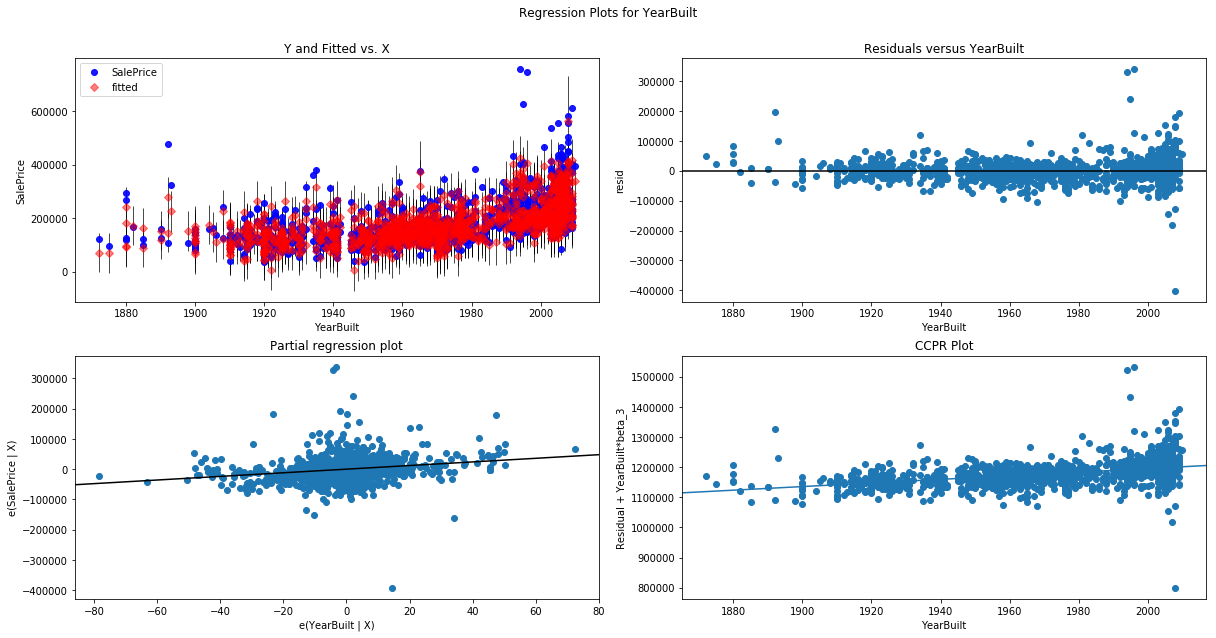

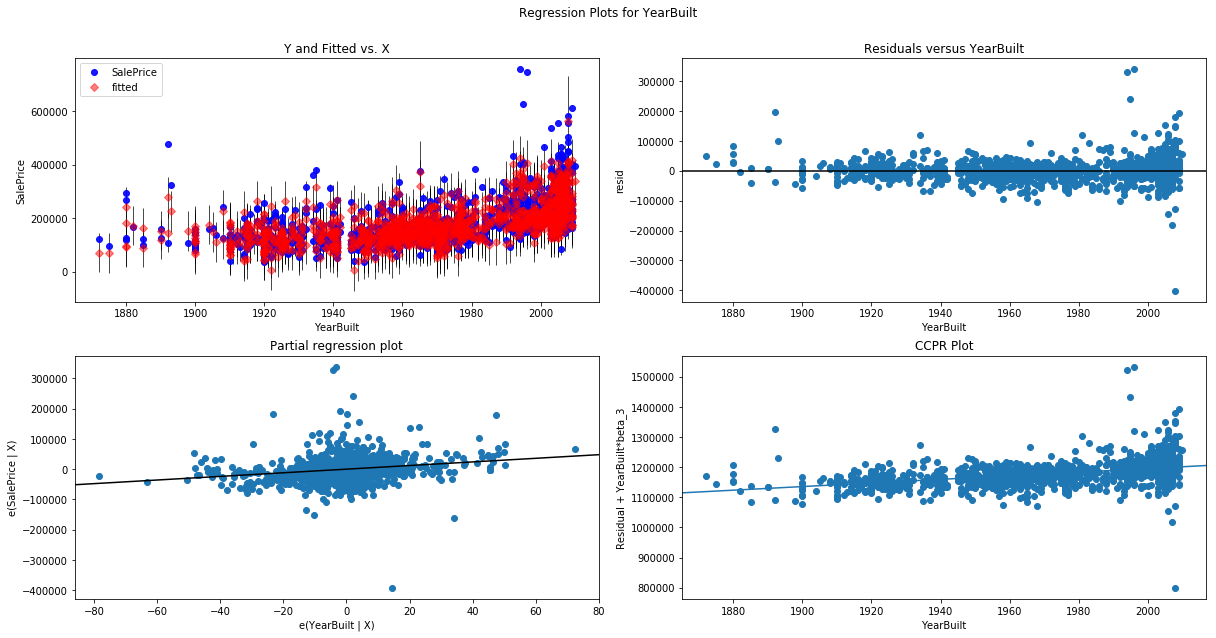

In [33]:
#specify the size of the figure
fig = plt.figure(figsize=(17,9))

#input the covariate for the partial regression plot
fig = sm.graphics.plot_regress_exog(res6, 'YearBuilt', fig=fig)

#display plot
fig

# Analysis of plot 2:

## While the actual SalePrice values do deviate a bit from the predicted values, the overall fit of the model seems to be fairly high and consistent.

## The only aspects in which the model struggles with-in terms of Yearbuilt--is for homes that were built in the late 1990s and early 2000s (in particular).

## Again, reassuringly, the residuals are not correlated with the Yearbuilt variable, which is one of the assumptions/important aspects of the OLS model.

# Use machine learning methods (i.e., bifurcate the dataset into training and test datasets) for regression models such as OLS, and Gradient Boosting via Scikitlearn.

# Use the same specification as OLS model 6 for the scikitlearn-implemented OLS.

## Import various sklearn modules

In [175]:
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

# Specify the data as training and test data

# Specify and bifurcate the housing dataset into a training and test/validation dataset. Then, fit an OLS model and derive predicitons from it using the validation data.

In [176]:
X_train, X_test, Y_train, Y_test = train_test_split(X6,Y6, test_size=0.2)

#specify the model as OLS/linear regression
mod = LinearRegression()

#fit the training data into the OLS model
mod.fit(X_train, Y_train)

#derive predictions from the testing dataset using the model's estimates
mod_predict = mod.predict(X_test)

#print the first several predictions from the array of scikitlearn-implemented OLS model estimates
print(mod_predict[0:3])

[[122369.93613783]
 [191201.16822719]
 [152824.53630012]]


## Show the intercept and coefficients of the scikitlearn OLS model

In [180]:
##show the intercept of the OLS model: i.e., for the model called 'mod':
mod.intercept_

array([-451724.70873384])

In [181]:
#show the coefficients of the OLS model
mod.coef_

array([[ 3.06381267e-08,  5.10717449e-01,  9.46602036e+03,
         1.97870138e+02,  1.11822996e+04,  9.07272896e+00,
        -4.67364640e+03,  1.58292553e+03, -2.06087489e+03,
        -2.09262073e+04,  1.79862505e+04,  3.84530990e+01,
         1.89691174e+04,  8.84634495e+02, -7.65101454e+03,
        -1.55872683e+04,  1.37158413e+04,  2.82148600e+04,
         1.64478611e+04,  3.33818531e+04, -2.93232208e+03,
         9.34549340e+03, -2.06683713e+03,  4.87483059e+02,
         4.23490790e+03, -6.02242532e+03,  7.75978367e+03,
         8.02673736e+04,  6.07176829e+04,  4.03604268e+03,
         1.48542247e+03,  4.37517660e+03,  7.25320315e+03,
         2.12204321e+04,  6.87738589e+04,  2.10995824e+04,
         4.76949343e+04,  2.09662012e+01]])

# Calculate the accuracy of the scikitlearn OLS model:

In [179]:
#print the accuracy score of the model
mod.score(X_train, Y_train)

0.812500468603559

# Analysis and comparison of scikitlearn OLS vs OLS model 6 (via statsmodels):

## Surprisingly, the accuracy of the models did not change much. The scikitlearn OLS model improved the accuracy of the model by a mere 0.15%. Namely, the scikitlearn OLS model has an accuracy score of 81.25%. Thus, conventional OLS was almost as effective as OLS implemented via scikitlearn (and statsmodels as a library is much better for presenting the coefficient estimates).

## However, more sophisticated implementations of machine learning algorithms, such as gradient Boosting, will most likely improve the overall accuracy of this model. Gradient boosting, for example, can help determine which specific variables in the model can be used to maximize goodness of fit.